In [83]:
#Data Mining Project 2

#load packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [84]:
#load Accident Information file; setting Accident_Index as index
accident = pd.read_csv("Accident_Information.csv", index_col = [0], low_memory=False)
accident.head()

,1st_Road_Class,1st_Road_Number,2nd_Road_Class,2nd_Road_Number,Accident_Severity,Carriageway_Hazards,Date,Day_of_Week,Did_Police_Officer_Attend_Scene_of_Accident,Junction_Control,...,Police_Force,Road_Surface_Conditions,Road_Type,Special_Conditions_at_Site,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Year,InScotland
Accident_Index,,,,,,,,,,,,,,,,,,,,,
200501BS00001,A,3218.0,NaN,0.0,Serious,None,2005-01-04,Tuesday,1.0,Data missing or out of range,...,Metropolitan Police,Wet or damp,Single carriageway,None,30.0,17:42,Urban,Raining no high winds,2005,No
200501BS00002,B,450.0,C,0.0,Slight,None,2005-01-05,Wednesday,1.0,Auto traffic signal,...,Metropolitan Police,Dry,Dual carriageway,None,30.0,17:36,Urban,Fine no high winds,2005,No
200501BS00003,C,0.0,NaN,0.0,Slight,None,2005-01-06,Thursday,1.0,Data missing or out of range,...,Metropolitan Police,Dry,Single carriageway,None,30.0,00:15,Urban,Fine no high winds,2005,No
200501BS00004,A,3220.0,NaN,0.0,Slight,None,2005-01-07,Friday,1.0,Data missing or out of range,...,Metropolitan Police,Dry,Single carriageway,None,30.0,10:35,Urban,Fine no high winds,2005,No
200501BS00005,Unclassified,0.0,NaN,0.0,Slight,None,2005-01-10,Monday,1.0,Data missing or out of range,...,Metropolitan Police,Wet or damp,Single carriageway,None,30.0,21:13,Urban,Fine no high winds,2005,No


In [85]:
#select features of interest
accident = accident[['Accident_Severity', 'Year', 'Day_of_Week', 'Light_Conditions', 'Number_of_Casualties', 'Number_of_Vehicles', 'Road_Type', 'Urban_or_Rural_Area']]
#drop NaN values
accident.dropna(inplace=True)
accident.head()

,Accident_Severity,Year,Day_of_Week,Light_Conditions,Number_of_Casualties,Number_of_Vehicles,Road_Type,Urban_or_Rural_Area
Accident_Index,,,,,,,,
200501BS00001,Serious,2005,Tuesday,Daylight,1,1,Single carriageway,Urban
200501BS00002,Slight,2005,Wednesday,Darkness - lights lit,1,1,Dual carriageway,Urban
200501BS00003,Slight,2005,Thursday,Darkness - lights lit,1,2,Single carriageway,Urban
200501BS00004,Slight,2005,Friday,Daylight,1,1,Single carriageway,Urban
200501BS00005,Slight,2005,Monday,Darkness - lighting unknown,1,1,Single carriageway,Urban


In [86]:
#load Vehicle Information file; setting Accident_Index as index
vehicle = pd.read_csv("Vehicle_Information.csv", index_col = [0], engine='python')
vehicle.head()

,Age_Band_of_Driver,Age_of_Vehicle,Driver_Home_Area_Type,Driver_IMD_Decile,Engine_Capacity_.CC.,Hit_Object_in_Carriageway,Hit_Object_off_Carriageway,Journey_Purpose_of_Driver,Junction_Location,make,...,Skidding_and_Overturning,Towing_and_Articulation,Vehicle_Leaving_Carriageway,Vehicle_Location.Restricted_Lane,Vehicle_Manoeuvre,Vehicle_Reference,Vehicle_Type,Was_Vehicle_Left_Hand_Drive,X1st_Point_of_Impact,Year
Accident_Index,,,,,,,,,,,,,,,,,,,,,
200401BS00001,26 - 35,3.0,Urban area,4.0,1588.0,None,None,Data missing or out of range,Data missing or out of range,ROVER,...,None,No tow/articulation,Did not leave carriageway,0.0,Going ahead other,2,109,Data missing or out of range,Front,2004
200401BS00002,26 - 35,NaN,Urban area,3.0,NaN,None,None,Data missing or out of range,Data missing or out of range,BMW,...,None,No tow/articulation,Did not leave carriageway,0.0,Going ahead other,1,109,Data missing or out of range,Front,2004
200401BS00003,26 - 35,4.0,Data missing or out of range,NaN,998.0,None,None,Data missing or out of range,Data missing or out of range,NISSAN,...,None,No tow/articulation,Did not leave carriageway,0.0,Turning right,1,109,Data missing or out of range,Front,2004
200401BS00003,66 - 75,NaN,Data missing or out of range,NaN,NaN,None,None,Data missing or out of range,Data missing or out of range,LONDON TAXIS INT,...,None,No tow/articulation,Did not leave carriageway,0.0,Going ahead other,2,109,Data missing or out of range,Front,2004
200401BS00004,26 - 35,1.0,Urban area,4.0,124.0,None,None,Data missing or out of range,Data missing or out of range,PIAGGIO,...,None,No tow/articulation,Did not leave carriageway,0.0,Going ahead other,1,Motorcycle 125cc and under,Data missing or out of range,Front,2004


In [87]:
#select features of interest
vehicle = vehicle[['Age_Band_of_Driver', 'Sex_of_Driver']]
#drop NaN values
vehicle.dropna(inplace=True)
vehicle.head()

,Age_Band_of_Driver,Sex_of_Driver
Accident_Index,,
200401BS00001,26 - 35,Male
200401BS00002,26 - 35,Male
200401BS00003,26 - 35,Male
200401BS00003,66 - 75,Male
200401BS00004,26 - 35,Male


In [88]:
#join accident and vehicle datasets
df = accident.join(vehicle, how='outer')
df.head()

,Accident_Severity,Year,Day_of_Week,Light_Conditions,Number_of_Casualties,Number_of_Vehicles,Road_Type,Urban_or_Rural_Area,Age_Band_of_Driver,Sex_of_Driver
Accident_Index,,,,,,,,,,
200401BS00001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26 - 35,Male
200401BS00002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26 - 35,Male
200401BS00003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26 - 35,Male
200401BS00003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,66 - 75,Male
200401BS00004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26 - 35,Male


In [89]:
#drop NaN values; vehicle dataset does not contain year 2004 data
#drop duplicated rows by index; keeping original duplication
df.dropna(inplace=True)
df = df[~df.index.duplicated(keep='first')]
df.head()

,Accident_Severity,Year,Day_of_Week,Light_Conditions,Number_of_Casualties,Number_of_Vehicles,Road_Type,Urban_or_Rural_Area,Age_Band_of_Driver,Sex_of_Driver
Accident_Index,,,,,,,,,,
200501BS00002,Slight,2005.0,Wednesday,Darkness - lights lit,1.0,1.0,Dual carriageway,Urban,36 - 45,Male
200501BS00003,Slight,2005.0,Thursday,Darkness - lights lit,1.0,2.0,Single carriageway,Urban,26 - 35,Male
200501BS00004,Slight,2005.0,Friday,Daylight,1.0,1.0,Single carriageway,Urban,46 - 55,Female
200501BS00005,Slight,2005.0,Monday,Darkness - lighting unknown,1.0,1.0,Single carriageway,Urban,46 - 55,Male
200501BS00006,Slight,2005.0,Tuesday,Daylight,1.0,2.0,Single carriageway,Urban,46 - 55,Male


In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1389724 entries, 200501BS00002 to 2016984133416
Data columns (total 10 columns):
Accident_Severity       1389724 non-null object
Year                    1389724 non-null float64
Day_of_Week             1389724 non-null object
Light_Conditions        1389724 non-null object
Number_of_Casualties    1389724 non-null float64
Number_of_Vehicles      1389724 non-null float64
Road_Type               1389724 non-null object
Urban_or_Rural_Area     1389724 non-null object
Age_Band_of_Driver      1389724 non-null object
Sex_of_Driver           1389724 non-null object
dtypes: float64(3), object(7)
memory usage: 116.6+ MB


In [91]:
#create dataframe total, with three columns
#set dataframe as type 'int64'
total = df[['Year','Number_of_Casualties','Number_of_Vehicles']]
total = total.astype('int64')
#set index as Year
total = total.set_index('Year')
total.head()

,Number_of_Casualties,Number_of_Vehicles
Year,,
2005,1,1
2005,1,2
2005,1,1
2005,1,1
2005,1,2


In [92]:
#sum column values by Year
total = total.groupby(total.index).sum()
total

,Number_of_Casualties,Number_of_Vehicles
Year,,
2005,133264,189198
2006,133319,190465
2007,143301,202161
2008,136441,191949
2009,177744,243625
2010,171892,235720
2011,169759,232598
2012,162809,224315
2013,155290,216718


Text(0.5, 0, 'Year')

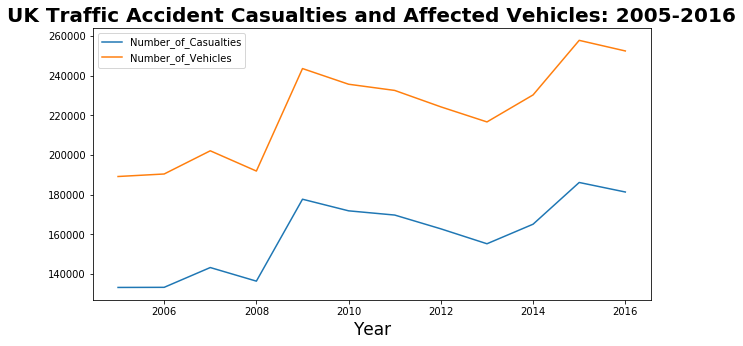

In [126]:
#graph traffic accident casualties and vehicle count by Year
ax = total.plot(kind='line', figsize=(10,5))
ax.set_title('UK Traffic Accident Casualties and Affected Vehicles: 2005-2016', fontweight="bold", size=20)
ax.set_xlabel("Year", fontsize=17)

In [94]:
#create dataframe accident_r with one column
accident_r = df[['Year']]
accident_r.head()

,Year
Accident_Index,
200501BS00002,2005.0
200501BS00003,2005.0
200501BS00004,2005.0
200501BS00005,2005.0
200501BS00006,2005.0


In [95]:
#encode Day of Week feature
one_hot = pd.get_dummies(df['Day_of_Week'])
#join the one hot encoding
accident_r = accident_r.join(one_hot)
accident_r = accident_r.astype('int64')
accident_r.head()

,Year,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
Accident_Index,,,,,,,,
200501BS00002,2005,0,0,0,0,0,0,1
200501BS00003,2005,0,0,0,0,1,0,0
200501BS00004,2005,1,0,0,0,0,0,0
200501BS00005,2005,0,1,0,0,0,0,0
200501BS00006,2005,0,0,0,0,0,1,0


In [96]:
#encode Light Conditions feature
one_hot = pd.get_dummies(df['Light_Conditions'])
#join the one hot encoding
accident_r = accident_r.join(one_hot)
del accident_r['Data missing or out of range']
del accident_r['Darkness - lighting unknown']
accident_r.head()

,Year,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Darkness - lights lit,Darkness - lights unlit,Darkness - no lighting,Daylight
Accident_Index,,,,,,,,,,,,
200501BS00002,2005,0,0,0,0,0,0,1,1,0,0,0
200501BS00003,2005,0,0,0,0,1,0,0,1,0,0,0
200501BS00004,2005,1,0,0,0,0,0,0,0,0,0,1
200501BS00005,2005,0,1,0,0,0,0,0,0,0,0,0
200501BS00006,2005,0,0,0,0,0,1,0,0,0,0,1


In [97]:
#encode Urban or Rural Area feature
one_hot = pd.get_dummies(df['Urban_or_Rural_Area'])
#join the one hot encoding
accident_r = accident_r.join(one_hot)
del accident_r['Unallocated']
#drop duplicated rows by index; keeping original duplication
accident_r = accident_r[~accident_r.index.duplicated(keep='first')]
accident_r.head()

,Year,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Darkness - lights lit,Darkness - lights unlit,Darkness - no lighting,Daylight,Rural,Urban
Accident_Index,,,,,,,,,,,,,,
200501BS00002,2005,0,0,0,0,0,0,1,1,0,0,0,0,1
200501BS00003,2005,0,0,0,0,1,0,0,1,0,0,0,0,1
200501BS00004,2005,1,0,0,0,0,0,0,0,0,0,1,0,1
200501BS00005,2005,0,1,0,0,0,0,0,0,0,0,0,0,1
200501BS00006,2005,0,0,0,0,0,1,0,0,0,0,1,0,1


In [98]:
#set index by Year
accident_r1 = accident_r.set_index('Year')
#sum column values by Year
accident_r1 = accident_r1.groupby(accident_r1.index).sum()
accident_r1

,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Darkness - lights lit,Darkness - lights unlit,Darkness - no lighting,Daylight,Rural,Urban
Year,,,,,,,,,,,,,
2005,15671,13352,12200,9714,14328,14016,14670,17227.0,455.0,4837.0,70816.0,35535.0,58376.0
2006,16191,13166,12355,9961,14426,14103,14615,17764.0,323.0,4714.0,71447.0,35302.0,59503.0
2007,16535,14794,13255,10830,15396,15302,15358,18448.0,395.0,5345.0,76428.0,39082.0,62377.0
2008,15887,14032,12603,10073,14427,15184,14924,17858.0,395.0,4893.0,73087.0,36084.0,61044.0
2009,20915,17764,17078,13724,18965,19286,19327,24398.0,491.0,6785.0,94245.0,47293.0,79766.0
2010,20518,18047,16546,13189,18441,18519,18469,22534.0,432.0,6330.0,93420.0,45873.0,77856.0
2011,20256,17327,16115,12957,19056,18064,18629,22906.0,533.0,6399.0,91314.0,43661.0,78743.0
2012,19109,16913,15497,12594,18071,17636,17883,22268.0,595.0,6000.0,86795.0,41803.0,75900.0
2013,19037,16287,14815,12083,17472,17543,16901,21654.0,622.0,5911.0,84364.0,41318.0,72820.0


In [99]:
#create dataframe accident_r2 with one column
#set dataframe as type 'int64'
accident_r2 = df[['Year']]
accident_r2 = accident_r2.astype('int64')
accident_r2.head()

,Year
Accident_Index,
200501BS00002,2005
200501BS00003,2005
200501BS00004,2005
200501BS00005,2005
200501BS00006,2005


In [100]:
#encode Sex of Driver feature
one_hot = pd.get_dummies(df['Sex_of_Driver'])
#join the one hot encoding
accident_r2 = accident_r2.join(one_hot)
del accident_r2['Data missing or out of range']
del accident_r2['Not known']
accident_r2.head()

,Year,Female,Male
Accident_Index,,,
200501BS00002,2005,0,1
200501BS00003,2005,0,1
200501BS00004,2005,1,0
200501BS00005,2005,0,1
200501BS00006,2005,0,1


In [101]:
#encode Road Type feature
one_hot = pd.get_dummies(df['Road_Type'])
#join the one hot encoding
accident_r2 = accident_r2.join(one_hot)
del accident_r2['Data missing or out of range']
del accident_r2['Unknown']
accident_r2.head()

,Year,Female,Male,Dual carriageway,One way street,Roundabout,Single carriageway,Slip road
Accident_Index,,,,,,,,
200501BS00002,2005,0,1,1,0,0,0,0
200501BS00003,2005,0,1,0,0,0,1,0
200501BS00004,2005,1,0,0,0,0,1,0
200501BS00005,2005,0,1,0,0,0,1,0
200501BS00006,2005,0,1,0,0,0,1,0


In [102]:
#encode Age Band of Driver feature; include prefix 'Age'
one_hot = pd.get_dummies(df['Age_Band_of_Driver'], prefix='Age')
#join the one hot encoding
accident_r2 = accident_r2.join(one_hot)
del accident_r2['Age_Data missing or out of range']
#drop duplicated rows by index; keeping original duplication
accident_r2 = accident_r2[~accident_r2.index.duplicated(keep='first')]
accident_r2.head()

,Year,Female,Male,Dual carriageway,One way street,Roundabout,Single carriageway,Slip road,Age_0 - 5,Age_11 - 15,Age_16 - 20,Age_21 - 25,Age_26 - 35,Age_36 - 45,Age_46 - 55,Age_56 - 65,Age_6 - 10,Age_66 - 75,Age_Over 75
Accident_Index,,,,,,,,,,,,,,,,,,,
200501BS00002,2005,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
200501BS00003,2005,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
200501BS00004,2005,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
200501BS00005,2005,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
200501BS00006,2005,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0


In [103]:
#set index by Year
accident_r3 = accident_r2.set_index('Year')
#sum column values by Year
accident_r3 = accident_r3.groupby(accident_r3.index).sum()
accident_r3

,Female,Male,Dual carriageway,One way street,Roundabout,Single carriageway,Slip road,Age_0 - 5,Age_11 - 15,Age_16 - 20,Age_21 - 25,Age_26 - 35,Age_36 - 45,Age_46 - 55,Age_56 - 65,Age_6 - 10,Age_66 - 75,Age_Over 75
Year,,,,,,,,,,,,,,,,,,
2005,24753.0,67184.0,15862.0,1977.0,6285.0,68178.0,1019.0,0.0,63.0,8372.0,9779.0,20361.0,21224.0,14008.0,8737.0,2.0,3321.0,1912.0
2006,25206.0,67561.0,15916.0,1952.0,6561.0,68770.0,1075.0,1.0,54.0,8343.0,9796.0,19986.0,21634.0,14310.0,9357.0,3.0,3387.0,1846.0
2007,27716.0,71747.0,17297.0,1996.0,6822.0,73423.0,1142.0,0.0,48.0,9462.0,10884.0,20887.0,22624.0,15522.0,9852.0,3.0,3836.0,2214.0
2008,27079.0,68026.0,16264.0,1938.0,6854.0,70216.0,1137.0,0.0,26.0,8798.0,10330.0,19849.0,21411.0,15041.0,9441.0,9.0,3731.0,2183.0
2009,37662.0,87099.0,19767.0,2373.0,8845.0,94025.0,1404.0,1.0,50.0,13690.0,15157.0,26028.0,25685.0,18977.0,11482.0,2.0,5082.0,3426.0
2010,37609.0,83868.0,19336.0,2361.0,8646.0,91447.0,1425.0,0.0,38.0,12769.0,14506.0,25330.0,24549.0,19019.0,11656.0,1.0,5155.0,3534.0
2011,37900.0,82229.0,18502.0,2300.0,8797.0,90895.0,1368.0,2.0,22.0,12240.0,14542.0,24890.0,23916.0,19168.0,11476.0,2.0,5466.0,3845.0
2012,36453.0,79066.0,17658.0,2028.0,8488.0,87789.0,1335.0,0.0,24.0,10448.0,14371.0,24039.0,22559.0,19252.0,11387.0,3.0,5451.0,3779.0
2013,35129.0,76809.0,17369.0,2118.0,7913.0,85106.0,1256.0,0.0,27.0,9139.0,13860.0,23736.0,21091.0,18834.0,11042.0,2.0,5768.0,4211.0


In [104]:
#create new dataframe, accident_rf, by joining the summed dataframes, accident_r1 and accident_r3
accident_rf = accident_r1.join(accident_r3)
accident_rf

,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Darkness - lights lit,Darkness - lights unlit,Darkness - no lighting,...,Age_11 - 15,Age_16 - 20,Age_21 - 25,Age_26 - 35,Age_36 - 45,Age_46 - 55,Age_56 - 65,Age_6 - 10,Age_66 - 75,Age_Over 75
Year,,,,,,,,,,,,,,,,,,,,,
2005,15671,13352,12200,9714,14328,14016,14670,17227.0,455.0,4837.0,...,63.0,8372.0,9779.0,20361.0,21224.0,14008.0,8737.0,2.0,3321.0,1912.0
2006,16191,13166,12355,9961,14426,14103,14615,17764.0,323.0,4714.0,...,54.0,8343.0,9796.0,19986.0,21634.0,14310.0,9357.0,3.0,3387.0,1846.0
2007,16535,14794,13255,10830,15396,15302,15358,18448.0,395.0,5345.0,...,48.0,9462.0,10884.0,20887.0,22624.0,15522.0,9852.0,3.0,3836.0,2214.0
2008,15887,14032,12603,10073,14427,15184,14924,17858.0,395.0,4893.0,...,26.0,8798.0,10330.0,19849.0,21411.0,15041.0,9441.0,9.0,3731.0,2183.0
2009,20915,17764,17078,13724,18965,19286,19327,24398.0,491.0,6785.0,...,50.0,13690.0,15157.0,26028.0,25685.0,18977.0,11482.0,2.0,5082.0,3426.0
2010,20518,18047,16546,13189,18441,18519,18469,22534.0,432.0,6330.0,...,38.0,12769.0,14506.0,25330.0,24549.0,19019.0,11656.0,1.0,5155.0,3534.0
2011,20256,17327,16115,12957,19056,18064,18629,22906.0,533.0,6399.0,...,22.0,12240.0,14542.0,24890.0,23916.0,19168.0,11476.0,2.0,5466.0,3845.0
2012,19109,16913,15497,12594,18071,17636,17883,22268.0,595.0,6000.0,...,24.0,10448.0,14371.0,24039.0,22559.0,19252.0,11387.0,3.0,5451.0,3779.0
2013,19037,16287,14815,12083,17472,17543,16901,21654.0,622.0,5911.0,...,27.0,9139.0,13860.0,23736.0,21091.0,18834.0,11042.0,2.0,5768.0,4211.0


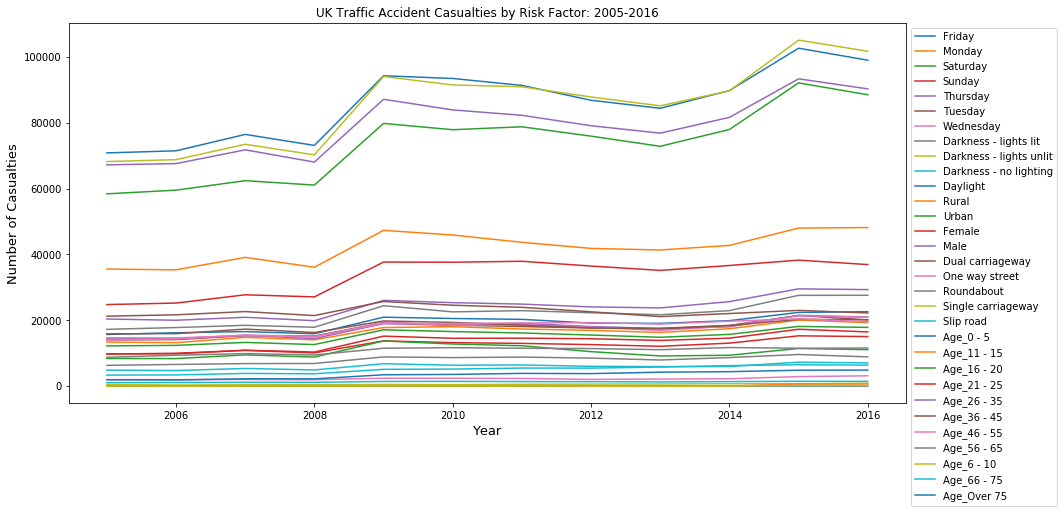

In [105]:
#graph traffic accident casualties by risk factors
ax = accident_rf.plot(kind='line', figsize=(15,7), title='UK Traffic Accident Casualties by Risk Factor: 2005-2016')
ax.set_xlabel("Year", fontsize=13)
ax.set_ylabel("Number of Casualties", fontsize=13)
ax.legend(bbox_to_anchor=(1.0, 1.0))

In [106]:
#sort risk factors by total casualties of peak year 2015
accident_rf.loc[2015].sort_values(ascending=False)

Single carriageway         105066.0
Daylight                   102608.0
Male                        93307.0
Urban                       92080.0
Rural                       47976.0
Female                      38243.0
Age_26 - 35                 29524.0
Darkness - lights lit       27551.0
Age_36 - 45                 22981.0
Friday                      22374.0
Thursday                    21479.0
Tuesday                     21431.0
Wednesday                   21368.0
Age_46 - 55                 20409.0
Dual carriageway            20266.0
Monday                      20032.0
Saturday                    18114.0
Age_21 - 25                 17253.0
Sunday                      15258.0
Age_56 - 65                 11478.0
Age_16 - 20                 11414.0
Roundabout                   9589.0
Darkness - no lighting       7258.0
Age_66 - 75                  6482.0
Age_Over 75                  4811.0
One way street               2873.0
Slip road                    1456.0
Darkness - lights unlit     

In [107]:
#create new column (Difference) that calculates the difference in Accident Casualties between the years 2005 and 2010
#and the years 2011-2016
#check values in '2005-2010_Difference' column to see countries with largest growth for either grouping
accident_rf.loc['2005-2010_Difference'] = accident_rf.T[2005] - accident_rf.T[2010]
accident_rf.loc['2011-2016_Difference'] = accident_rf.T[2011] - accident_rf.T[2016]

In [108]:
#function to graph a horizontal bar plot of the Difference in Accident Casualties (2005-2010; 2011-2016)
def bar_diff(df1, df2):
    fig, axs = plt.subplots(1, 2)
    df1.plot(ax=axs[0], kind='barh', stacked=True, sort_columns=True, figsize=(13,7),fontsize=10)
    axs[0].axvline(0, color='black') #draw vertical line through 0; color black
    df2.plot(ax=axs[1], kind='barh', stacked=True, sort_columns=True, figsize=(13,7),fontsize=10)
    fig.suptitle('Difference in Accident Casualties (2005-2010; 2011-2016)', fontsize=15)
    plt.xlabel('Difference(# of Casualties)', fontsize=13)
    plt.ylabel('Risk Factors', fontsize=13)
    plt.subplots_adjust(wspace = 0.5)
    axs[1].axvline(0, color='black')
    plt.show()

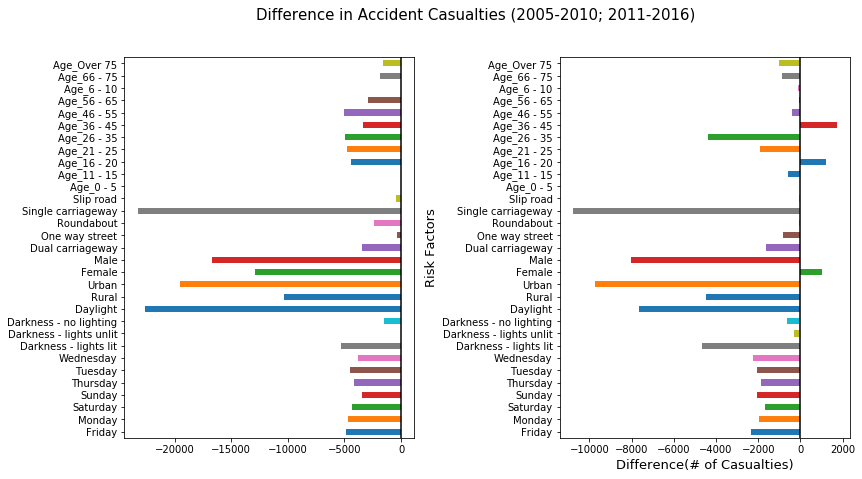

In [109]:
bar_diff(accident_rf.loc['2005-2010_Difference'], accident_rf.loc['2011-2016_Difference'])

In [110]:
#create new dataframe, data1, from top 5 and lowest 5 risk factors
data1 = accident_r2[['Single carriageway', 'Male', 'Age_0 - 5', 'Age_6 - 10', 'Age_11 - 15', 'Slip road']]

In [111]:
#add features of interest to data1 dataframe
data1['Daylight'] = accident_r[['Daylight']]
data1['Rural'] = accident_r[['Rural']]
data1['Urban'] = accident_r[['Urban']]
data1['Year'] = accident_r[['Year']]
data1['Darkness - lights unlit'] = accident_r[['Darkness - lights unlit']]

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

In [112]:
#severity = data1.join(df[['Accident_Severity']])
severity = data1.assign(Accident_Severity=df['Accident_Severity'].values)
#data1['Accident_Severity'] = df['Accident_Severity']
severity.head()

,Single carriageway,Male,Age_0 - 5,Age_6 - 10,Age_11 - 15,Slip road,Daylight,Rural,Urban,Year,Darkness - lights unlit,Accident_Severity
Accident_Index,,,,,,,,,,,,
200501BS00002,0,1,0,0,0,0,0,0,1,2005,0,Slight
200501BS00003,1,1,0,0,0,0,0,0,1,2005,0,Slight
200501BS00004,1,0,0,0,0,0,1,0,1,2005,0,Slight
200501BS00005,1,1,0,0,0,0,0,0,1,2005,0,Slight
200501BS00006,1,1,0,0,0,0,1,0,1,2005,0,Slight


In [113]:
#set index as Accident Severity
#create MultiIndex
severity = severity.set_index('Accident_Severity')
severity = severity.groupby(['Year',severity.index]).sum()
severity.head()

Single carriageway     Male  Age_0 - 5  Age_6 - 10  \
Year Accident_Severity                                                       
2005 Fatal                          1096.0   1242.0        0.0         0.0   
     Serious                        8814.0   8987.0        0.0         0.0   
     Slight                        58268.0  56955.0        0.0         2.0   
2006 Fatal                          1157.0   1330.0        0.0         0.0   
     Serious                        9302.0   9385.0        0.0         1.0   

                        Age_11 - 15  Slip road  Daylight    Rural    Urban  \
Year Accident_Severity                                                       
2005 Fatal                      1.0       13.0     925.0   1010.0    457.0   
     Serious                   25.0       87.0    7995.0   5388.0   6034.0   
     Slight                    37.0      919.0   61896.0  29137.0  51885.0   
2006 Fatal                      0.0        9.0     966.0   1020.0    528.0   
     Serious                   12.0       86.0    8388.0   5267.0   6644.0   

                        Darkness - lights unlit  
Year Accident_Severity                           
2005 Fatal                                 10.0  
     Serious                               59.0  
     Slight                               386.0  
2006 Fatal                                  6.0  
     Serious                               42.0

In [114]:
#function to graph a multi-bar bar chart of the traffic accident severity data
def bar_severity(df, year1, year2):
    fig, axs = plt.subplots(1, 2)
    df.xs(year1).plot(ax=axs[0], kind='bar', figsize=(13,5))
    df.xs(year2).plot(ax=axs[1], kind='bar', figsize=(13,5))
    fig.suptitle('UK Traffic Accident Severity by Top 5 and Lowest 5 Risk Factors', fontsize=15)

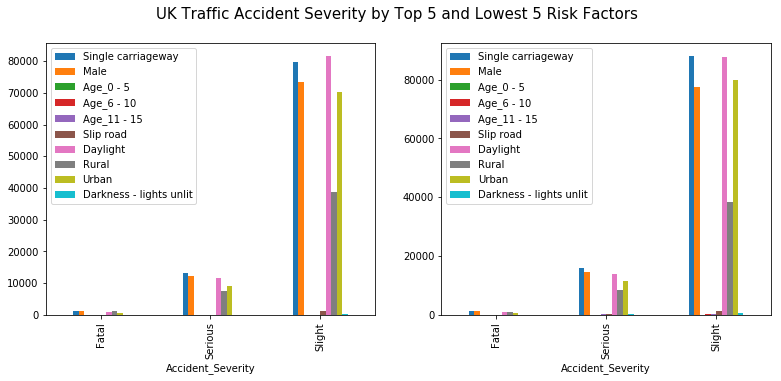

In [115]:
bar_severity(severity, 2009, 2015)

In [116]:
df_final = df[['Year','Number_of_Casualties','Number_of_Vehicles','Road_Type','Light_Conditions']]
df_final['Year'] = df_final['Year'].astype('int64')
df_final.head()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Year,Number_of_Casualties,Number_of_Vehicles,Road_Type,Light_Conditions
Accident_Index,,,,,
200501BS00002,2005,1.0,1.0,Dual carriageway,Darkness - lights lit
200501BS00003,2005,1.0,2.0,Single carriageway,Darkness - lights lit
200501BS00004,2005,1.0,1.0,Single carriageway,Daylight
200501BS00005,2005,1.0,1.0,Single carriageway,Darkness - lighting unknown
200501BS00006,2005,1.0,2.0,Single carriageway,Daylight


In [117]:
#set index by Year
df_final = df_final.set_index('Year')
#sum column values by Year
sc_d = (df_final['Road_Type'] == 'Single carriageway') | (df_final['Light_Conditions'] == 'Daylight')
df_final = df_final.groupby([np.where(sc_d, 'Single_carriageway_Daylight', 'Other'),df_final.index])['Number_of_Casualties','Number_of_Vehicles'].sum()
df_final

Number_of_Casualties  Number_of_Vehicles
                            Year                                          
Other                       2005               10037.0             14105.0
                            2006               10044.0             14015.0
                            2007               11092.0             15071.0
                            2008               10593.0             14404.0
                            2009               13255.0             17562.0
                            2010               12493.0             16406.0
                            2011               12461.0             16516.0
                            2012               11985.0             15998.0
                            2013               11507.0             15649.0
                            2014               12165.0             16357.0
                            2015               13939.0             18690.0
                            2016               14484.0             19526.0
Single_carriageway_Daylight 2005              123227.0            175093.0
                            2006              123275.0            176450.0
                            2007              132209.0            187090.0
                            2008              125848.0            177545.0
                            2009              164489.0            226063.0
                            2010              159399.0            219314.0
                            2011              157298.0            216082.0
                            2012              150824.0            208317.0
                            2013              143783.0            201069.0
                            2014              152987.0            213982.0
                            2015              172250.0            239155.0
                            2016              166900.0            232974.0

In [118]:
df_final_csd = df_final.xs('Single_carriageway_Daylight')
df_final_csd['Percent_casualties'] = df_final_csd['Number_of_Casualties'] / total['Number_of_Casualties'] * 100
df_final_csd

,Number_of_Casualties,Number_of_Vehicles,Percent_casualties
Year,,,
2005,123227.0,175093.0,92.468334
2006,123275.0,176450.0,92.466190
2007,132209.0,187090.0,92.259649
2008,125848.0,177545.0,92.236205
2009,164489.0,226063.0,92.542646
2010,159399.0,219314.0,92.732064
2011,157298.0,216082.0,92.659594
2012,150824.0,208317.0,92.638613
2013,143783.0,201069.0,92.589993


In [119]:
df_final_csd['Percent_vehicles'] = df_final_csd['Number_of_Vehicles'] / total['Number_of_Vehicles'] * 100
df_final_csd

,Number_of_Casualties,Number_of_Vehicles,Percent_casualties,Percent_vehicles
Year,,,,
2005,123227.0,175093.0,92.468334,92.544847
2006,123275.0,176450.0,92.466190,92.641693
2007,132209.0,187090.0,92.259649,92.545051
2008,125848.0,177545.0,92.236205,92.495923
2009,164489.0,226063.0,92.542646,92.791380
2010,159399.0,219314.0,92.732064,93.040048
2011,157298.0,216082.0,92.659594,92.899337
2012,150824.0,208317.0,92.638613,92.868065
2013,143783.0,201069.0,92.589993,92.779095


In [120]:
#function to graph the percentage of casualties and vehicles involved in accident, by year
#related to Single carriageway road types and Daylight light conditions
def plot_percent(df):
    ax = df[['Percent_casualties', 'Percent_vehicles']].plot(figsize=(10,5), fontsize=12)
    plt.legend(bbox_to_anchor=(1.3, 1.00), fontsize=13)
    plt.title('Percentage of casualties and vehicles (Single carriageway/Daylight), by Year', fontsize=15)
    ax.set_xlabel('Year', fontsize=12)
    ax.set_ylabel('Percent', fontsize=12)
    plt.show()

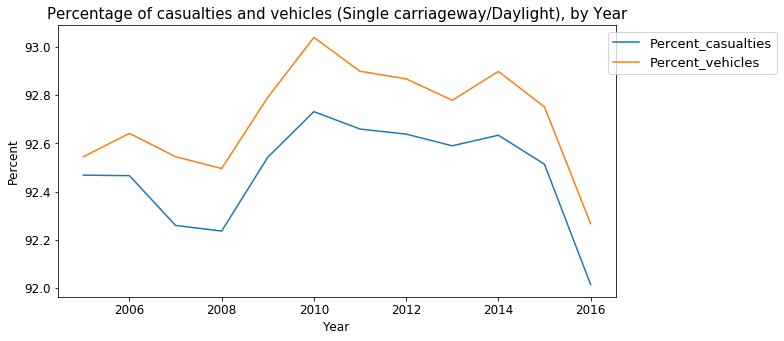

In [121]:
plot_percent(df_final_csd)